In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [85]:
dataset = pd.read_csv('../Resources/diagnosis-of-covid-19-and-its-clinical-spectrum.csv')
dataset.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
dataset_selected = dataset.loc[:, ["patient_id","patient_age_quantile","sars_cov_2_exam_result","hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]]
dataset_selected.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose
0,44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648
2,a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
list_X = ["hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]
for x in list_X:
    dataset_selected[x].fillna(dataset_selected[x].mean(), inplace = True)

In [88]:
dataset_selected.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose
0,44477f75e8169d2,13,negative,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09
1,126e9dd13932f68,17,negative,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,-2.922693e-01,1.482158e+00,1.661924e-01,3.575467e-01,-6.250727e-01,-1.406481e-01
2,a46b4402a0e5696,8,negative,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09
3,f7d619a94f97c45,5,negative,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09
4,d9e41465789c2b5,15,negative,-2.186214e-09,-1.601319e-08,-3.535003e-10,7.438143e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155370e-09,-3.220114e-09,1.020433e-08,7.069992e-09


In [89]:
X = dataset_selected.loc[: , ["hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]]
Y = dataset_selected.loc[: , ["sars_cov_2_exam_result"]]
print(Y)

     sars_cov_2_exam_result
0                  negative
1                  negative
2                  negative
3                  negative
4                  negative
...                     ...
5639               positive
5640               negative
5641               negative
5642               negative
5643               positive

[5644 rows x 1 columns]


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [92]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_value_count = {k:v for (k,v) in zip(unique,count)}
Y_train_value_count


{'negative': 3401, 'positive': 380}

In [93]:
sm = SMOTE(random_state = 12)
X_train_res, Y_train_res = sm.fit_sample(X_train,Y_train)

In [94]:
unique, count = np.unique(Y_train_res, return_counts = True)
Y_train_smote_value_count = {k:v for (k,v) in zip(unique,count)}
Y_train_smote_value_count

{'negative': 3401, 'positive': 3401}

In [95]:
clf = LogisticRegression().fit(X_train_res, Y_train_res)

/Users/arun/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
Y_Test_Pred = clf.predict(X_test)

In [97]:
pd.crosstab(Y_Test_Pred, Y_test["sars_cov_2_exam_result"], rownames=['Predicted'], colnames=['Actual'])

Actual,negative,positive
Predicted,,
negative,1608,148
positive,77,30


In [98]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

print ('Accuracy Score :',accuracy_score(Y_test, Y_Test_Pred) )
print ('Report : ')
print (classification_report(Y_test, Y_Test_Pred) )


Accuracy Score : 0.8792270531400966
Report : 
              precision    recall  f1-score   support

    negative       0.92      0.95      0.93      1685
    positive       0.28      0.17      0.21       178

    accuracy                           0.88      1863
   macro avg       0.60      0.56      0.57      1863
weighted avg       0.86      0.88      0.87      1863



In [107]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
grid= GridSearchCV(clf, parameters, cv=5, verbose=5, n_jobs=3)
grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  18 tasks      | elapsed:    0.2s


Best parameters : {'C': 1.0}


[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.6s finished
/Users/arun/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
print(grid_result.best_score_)

0.8973824551103282


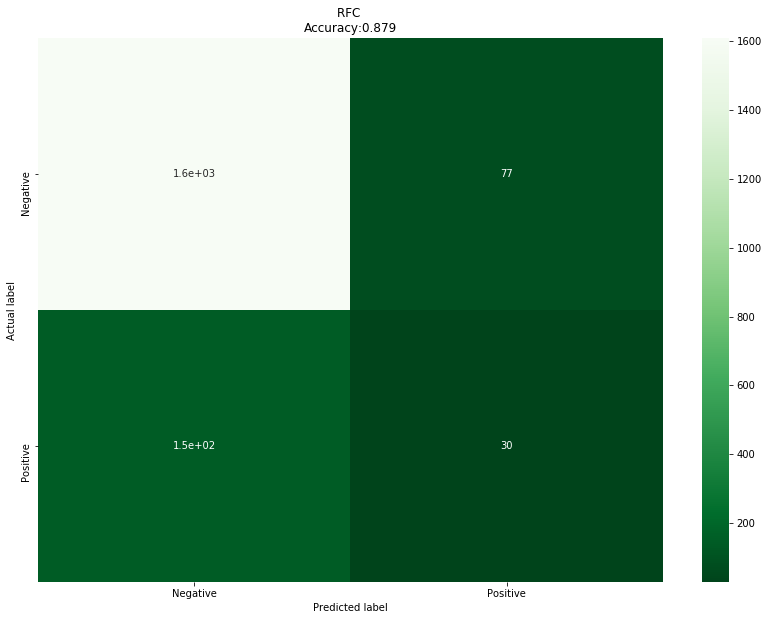

In [112]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support


def plot_cm(y_test,y_pred,labels):
    # Creates a confusion matrix
    cm = confusion_matrix(Y_test, Y_Test_Pred) # for the tuned model

    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                        index = labels, 
                        columns = labels)


    plt.figure(figsize=(14,10))  
    sns.heatmap(cm_df, annot=True, cmap = "Greens_r")
    plt.title('RFC \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

plot_cm(Y_test, Y_Test_Pred, ['Negative','Positive'])
